# PROGETTO BLACK FRIDAY

Come prima cosa importiamo il dataset. 


In [1]:
dati <- read.csv("BlackFriday.csv", header = TRUE)
summary(dati)

    User_ID            Product_ID     Gender        Age        
 Min.   :1000001   P00265242:  1858   F:132197   0-17 : 14707  
 1st Qu.:1001495   P00110742:  1591   M:405380   18-25: 97634  
 Median :1003031   P00025442:  1586              26-35:214690  
 Mean   :1002992   P00112142:  1539              36-45:107499  
 3rd Qu.:1004417   P00057642:  1430              46-50: 44526  
 Max.   :1006040   P00184942:  1424              51-55: 37618  
                   (Other)  :528149              55+  : 20903  
   Occupation     City_Category Stay_In_Current_City_Years Marital_Status  
 Min.   : 0.000   A:144638      0 : 72725                  Min.   :0.0000  
 1st Qu.: 2.000   B:226493      1 :189192                  1st Qu.:0.0000  
 Median : 7.000   C:166446      2 : 99459                  Median :0.0000  
 Mean   : 8.083                 3 : 93312                  Mean   :0.4088  
 3rd Qu.:14.000                 4+: 82889                  3rd Qu.:1.0000  
 Max.   :20.000                 

Vediamo un po' quali variabili abbiamo:
- User_ID = codice identificativo del cliente (magari vedere se un cliente ha acquistato più volte o se sono tutti diversi)
- Product_ID = codice identificativo del prodotto acquistato (anche qua potrebbe essere interessante vedere quanti prodotti diversi ci sono)
- Gender = genere del cliente
- Age = classi di età (questo vuol dire che il problema 4 è unn problema di classificazione. )
- Occupation =  lavoro del cliente. Cercare di capire cosa cazzo vuol dire che è numerica
- City_Category =  wtf? Potrebbe essere grande - media - piccola (?!)
- Stay_In_Current_City_Years =  quanti anni è stato il cliente nella città in cui risiede. Variabile categorica. 
- 
- 


In [2]:
head(dati)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NA,NA,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


Guardando i dati così dall'alto possiamo vedere come ci siano dei dati mancanti. Per poter capire meglio quali e quanti siano andiamo a fare un po' di conti. 


In [3]:
dim(dati)

[1] 537577     12

## VALORI MANCANTI

In [4]:
missing_values = rep(0,12)
for(i in 1:12){
   missing_values[i] = sum(is.na(dati[,i]))

}
for(i in 1:12){
    print(paste(colnames(dati)[i],missing_values[i]))
}

[1] "User_ID 0"
[1] "Product_ID 0"
[1] "Gender 0"
[1] "Age 0"
[1] "Occupation 0"
[1] "City_Category 0"
[1] "Stay_In_Current_City_Years 0"
[1] "Marital_Status 0"
[1] "Product_Category_1 0"
[1] "Product_Category_2 166986"
[1] "Product_Category_3 373299"
[1] "Purchase 0"


Quindi le uniche colonne che presentano valori mancanti sono le colonne Product_Category2 e Product_Category3. Ma quanti sono in totale questi missing values in percentuale?

In [5]:
n = dim(dati)[1]


In [6]:
percentuale2 = sum(is.na(dati$Product_Category_2)) / n
percentuale3 = sum(is.na(dati$Product_Category_3)) / n
cat("Total rows: ", n,"\n","Prod 2 missing: ", percentuale2 * 100,"% \n",
   "Prod 3 missing: ", percentuale3 * 100, "% \n")

Total rows:  537577 
 Prod 2 missing:  31.06271 % 
 Prod 3 missing:  69.44103 % 


Nella colonna "Product_Category_3" abbiamo una mancanza di circa il 70 %. Occorre tenerne conto nel caso in cui volessimo usare questa viariabile. Magari si potrebbe vedere in base a Prod 1 e Prod 2 come sono i valori della Cat 3 (una sorta di problema di classificazione interno al problema più grande).

Un'altra cosa interessante per quanto riguarda l'analisi delle variabili Product_Category_x potrebbe essere quello di vedere qual è il numero di categorie "uniche".

In [7]:
#install.packages("data.table",repos = "http://cran.us.r-project.org")
#library(data.table)
#install.packages("tidyverse",repos = "http://cran.us.r-project.org")
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [8]:
dati %>% 
    as.tibble() %>% 
    count(Product_Category_2)

Product_Category_2,n
2,48481
3,2835
4,25225
5,25874
6,16251
7,615
8,63058
9,5591
10,2991
11,13945


In [9]:
dati %>% 
    as.tibble() %>% 
    count(Product_Category_3)

Product_Category_3,n
3,600
4,1840
5,16380
6,4818
8,12384
9,11414
10,1698
11,1773
12,9094
13,5385


In [10]:
dati %>% 
    as.tibble() %>% 
    count(Product_Category_1,Product_Category_2,Product_Category_3)

Product_Category_1,Product_Category_2,Product_Category_3,n
1,2,3,600
1,2,4,513
1,2,5,7877
1,2,6,1903
1,2,8,2765
1,2,9,4350
1,2,11,1559
1,2,13,1333
1,2,14,3487
1,2,15,14657


Possiamo vedere che i valori per le varie categorie cominciano da 1 quindi è possibile utilizzare 0 come valore per le missing informations in modo da poter utilizzare valori numerici. 

In [11]:
#install.packages("OpasnetUtils",repos = "http://cran.us.r-project.org")
library(OpasnetUtils)

Warning message:
"package 'OpasnetUtils' was built under R version 3.5.2"
Attaching package: 'OpasnetUtils'

The following object is masked from 'package:dplyr':

    combine



In [12]:
 dati[is.na(dati)] <- 0

## DATA TYPES AND REPRESENTATION

Quello che occorre fare ora è andare a studiare le altre variabili per cercare di capire un po' come sono distribuite e di quale tipo sono. Così facendo si avranno più informazioni che saranno utili nella risoluzione del problema. 

### User_ID and Product_ID

In questo caso abbiamo dei codici (il che vuol dire che potremmo considerare questa variabile categorica.) Per avere qualche informazione in più potremmo andare a vedere quanti sono i valori unici all'interno di queste due colonne della matrice.

In [13]:
clienti_unici <- unique(dati$User_ID)
prodotti_unici <- unique(dati$Product_ID)

length(clienti_unici)
length(prodotti_unici)

head(clienti_unici)

[1] 5891

[1] 3623

[1] 1000001 1000002 1000003 1000004 1000005 1000006

Abbiamo quindi circa 6000 utenti e 3600 prodotti diversi. Ricordando che il dataset ha circa mezzo milione di righe questo significa che in media ogni utente ha eseguito 100 acquisti e che ogni prodotto è stato comprato in media 160 volte. 

### Gender, Age, Occupation e City_Category

Qua non occorre andare a vedere particolari tipi visto che sono pretty straight-forward. Sono tutte varibili categoriche.  

### Stay_In_Current_Years

Questa colonna presenta valori come stringhe. Occorre decidere se vogliamo trasformarla in variabili numerica (mantenendo linearità ma perdendo informazioni 4 o + potrebbe essere 11 anni e quindi immaginare errore) oppure possiamo tenerla categorica ma attenzione alla perdità della linearità.

### Marital_Status

Anche qua poco da dire. Potrebbe essere interessante andare ad utilizzare interazione di questa variabile insieme ad altri come età, genere o occupazione. 

## Data Distributions

Vedere meglio le distribuzioni marginali delle varie variabili. Chiaramente per quelle per cui ha senso fare questa cosa : 
- Sesso
- Situa matrimoniale
- Age
- Città
- Residenza
(quelle con poche modalità essenzialmente).

In [14]:
library(ggplot2)
options(scipen = 5)

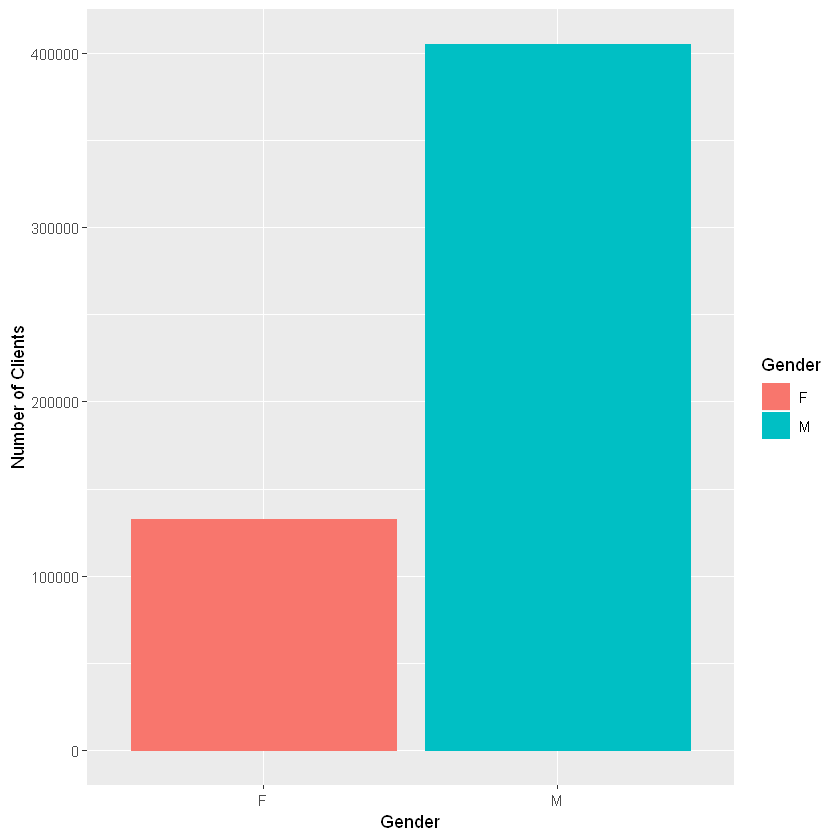

In [15]:
p <- ggplot(dati, aes(x = Gender, color = Gender, fill = Gender)) + 
    geom_bar() +
    ylab("Number of Clients") 

p

Molti più maschi che femmine, ma con il fatto che sono ripetuti alcuni utenti occorre cambiare il dataset per ottenere informazioni più accurate.

In [16]:
sesso_unico <- dati$Gender[dati$User_ID == clienti_unici]
length(sesso_unico)

Warning message in dati$User_ID == clienti_unici:
"longer object length is not a multiple of shorter object length"

[1] 90

In [17]:
tmp <- aggregate(Purchase ~ User_ID, data= dati, sum ) ##COUNTS NUMBER OF PURCHASES
names(tmp) <- c("User_ID", "purchase_count")


purchase_count <- tmp[,2]
friday.users <- merge(tmp, dati, by = "User_ID", all.y = FALSE)
friday.users <- cbind(distinct(dati, User_ID, Age, Gender, Marital_Status, Occupation,
                         City_Category, Stay_In_Current_City_Years), purchase_count)

head(friday.users)

User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,purchase_count
1000001,F,0-17,10,A,2,0,333481
1000002,M,55+,16,C,4+,0,810353
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,205987
1000005,M,26-35,20,A,1,1,821001
1000006,F,51-55,9,A,1,0,379450


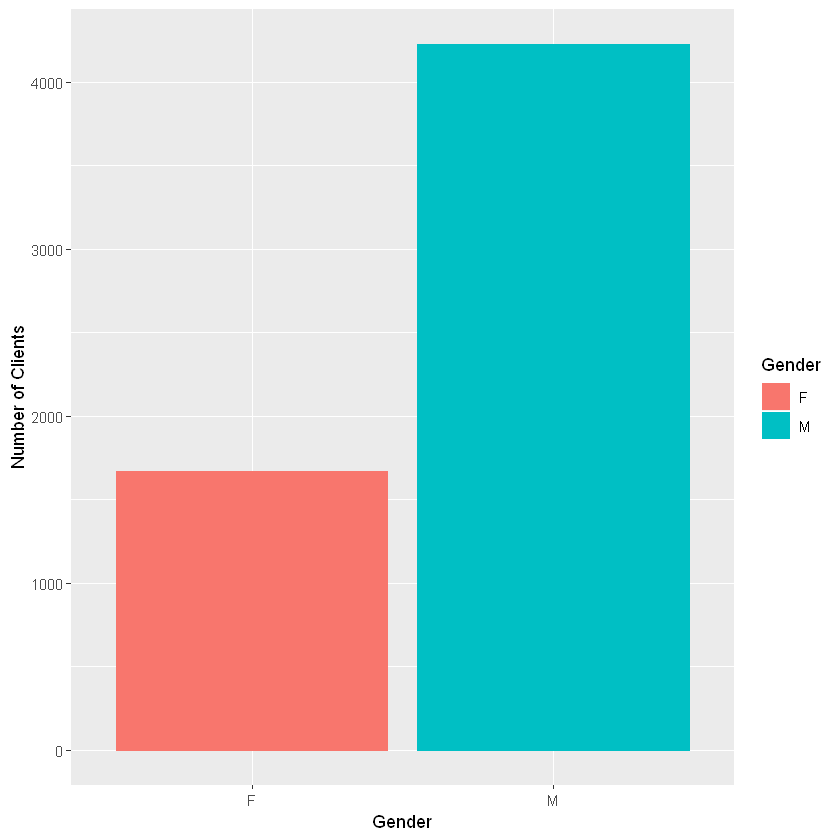

In [18]:
p <- ggplot(friday.users, aes(x = Gender, color = Gender, fill = Gender)) + 
    geom_bar() +
    ylab("Number of Clients") 

p

Frequenze molto diminuite ma comunque prevalenza di maschi. Quasi il doppio. 

### AGE

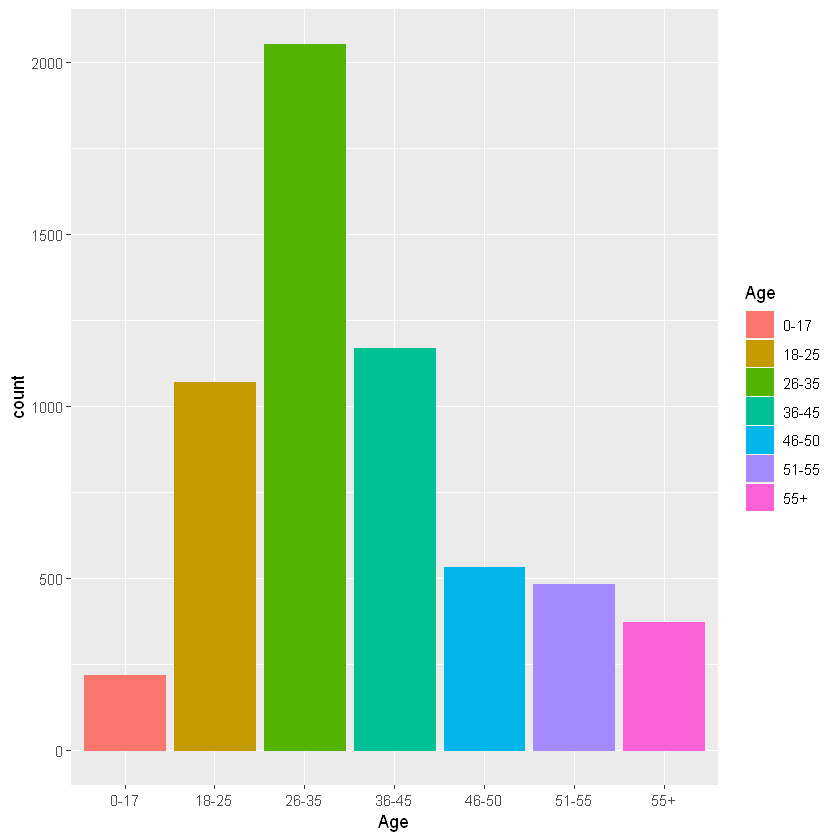

In [19]:
p2 <- ggplot(friday.users, aes(x = Age, color = Age, fill = Age)) +
    geom_bar() 
   
p2

La maggior parte dei clienti presenta età compresa tra 26 e i 35. Potrebbe essere interessante vedere come questo si comporta con variabile sesso. 

### AGE + GENDER

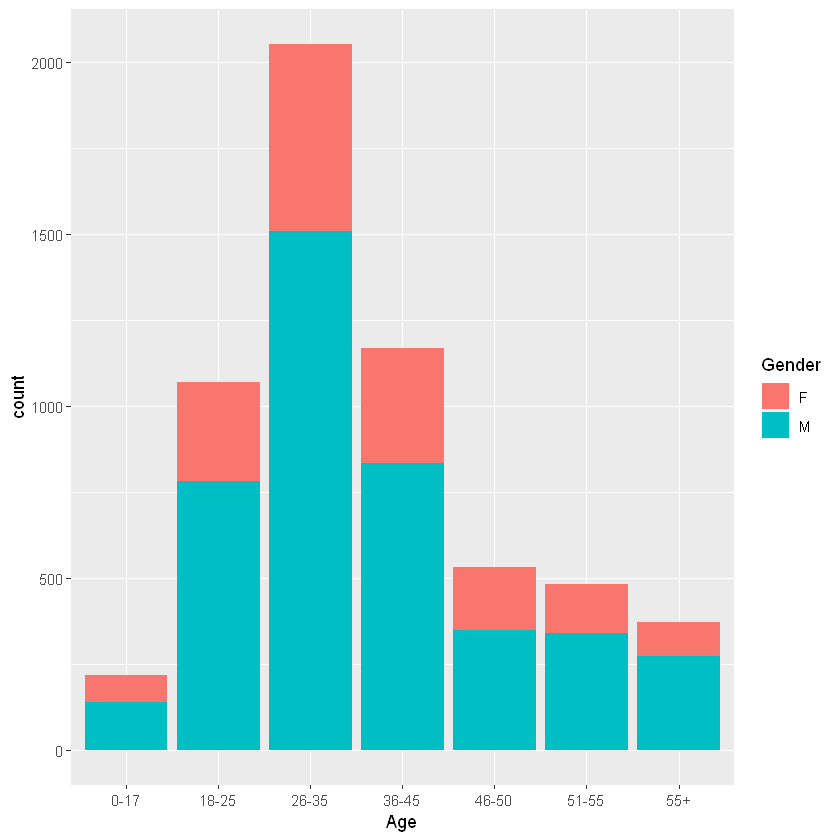

In [28]:
p3 <- ggplot(friday.users, aes(x = Age, fill = Gender)) +
    geom_bar() 
    
p3

### City Category

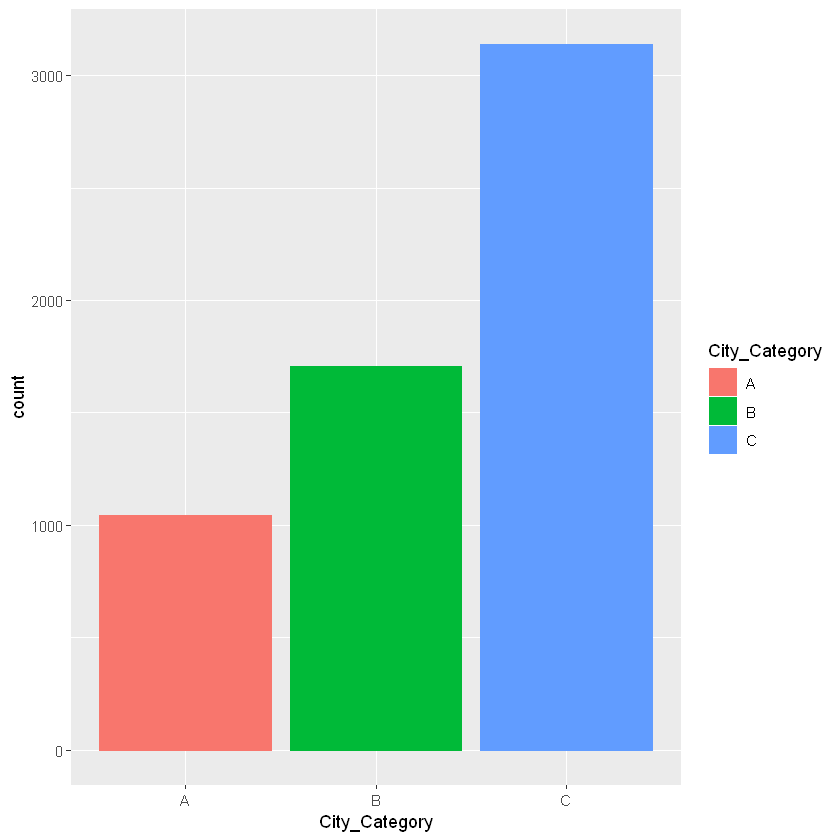

In [21]:
p4 <- ggplot(friday.users, aes(x = City_Category, color = City_Category, fill = City_Category)) +
    geom_bar() 
    
p4

Prevalenza di clienti provenienti da città di categoria C.

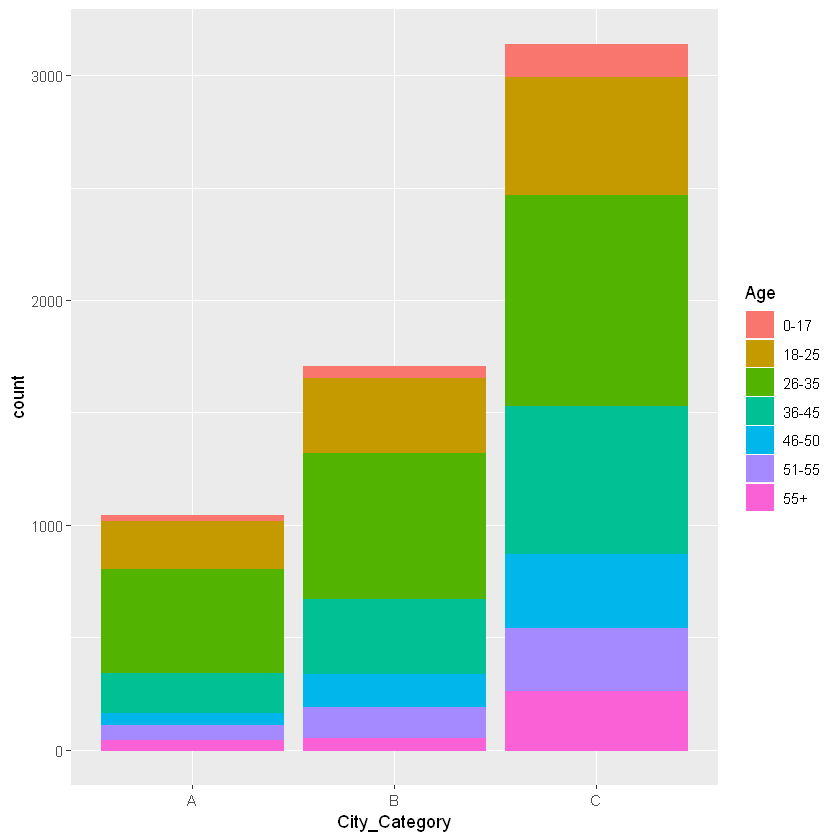

In [22]:
p3 <- ggplot(friday.users, aes(x = City_Category, color = Age, fill = Age)) +
    geom_bar() 
    
p3

Inutile.

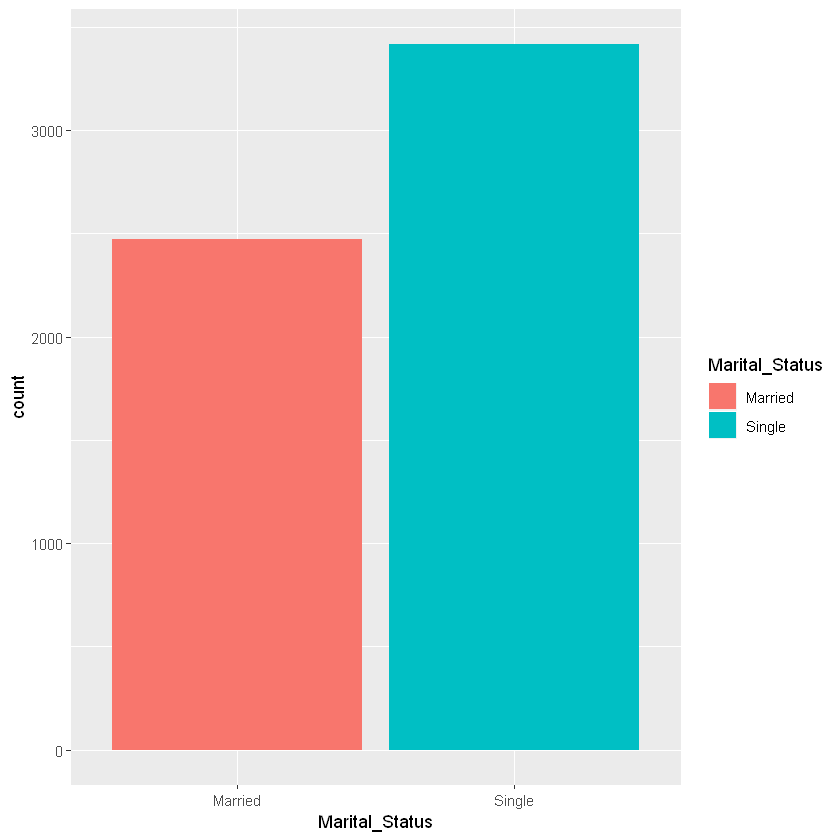

In [23]:
friday.users$Marital_Status <- as.factor(ifelse(friday.users$Marital_Status == 1, 'Married', 'Single'))
p5 <- ggplot(friday.users, aes(x = Marital_Status, fill = Marital_Status)) +
    geom_bar() 
    

p5

Più single che sposati. 

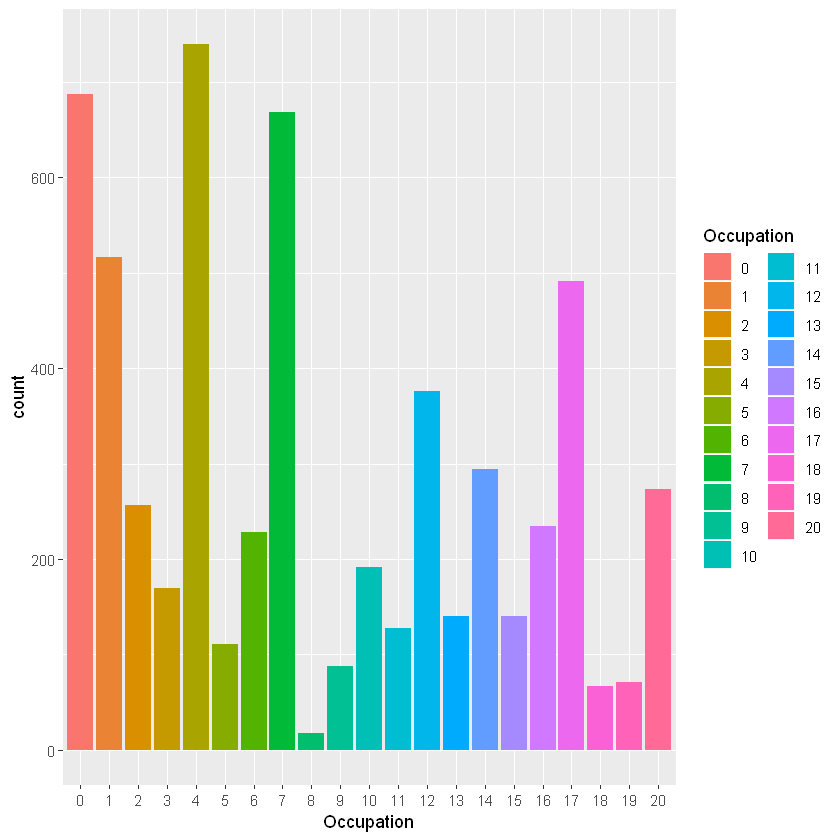

In [24]:
friday.users$Occupation <- as.factor(friday.users$Occupation)
p5 <- ggplot(friday.users, aes(x = Occupation, fill = Occupation)) +
    geom_bar() 

p5

SArebbe interessante scoprire cosa vogliono dire tutti questi numeretti magari per capire reddito di ogni classe occupazionale.

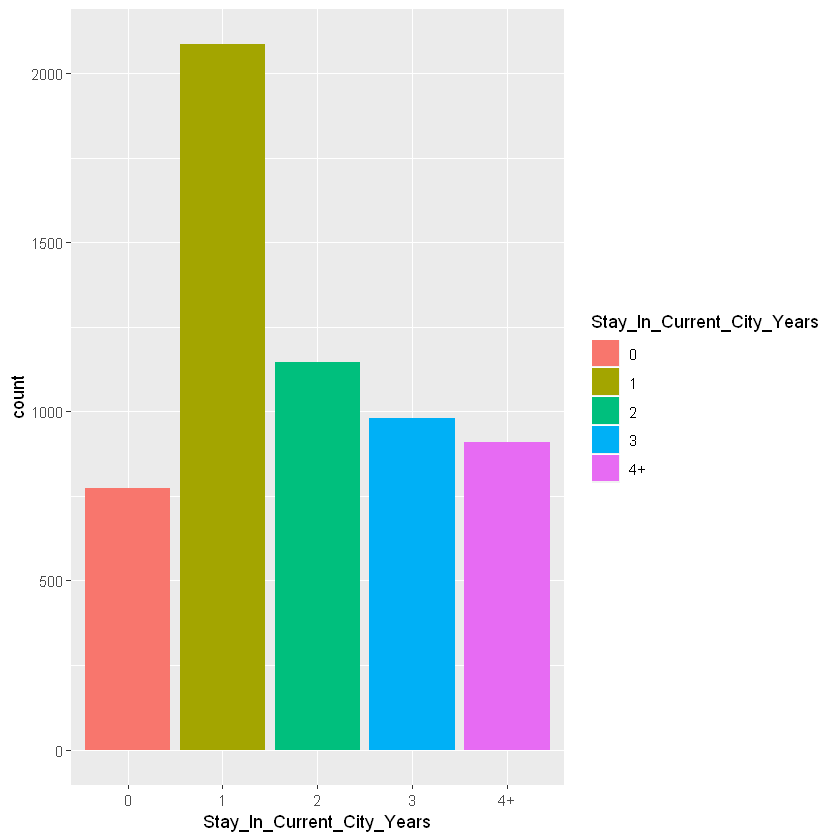

In [25]:
friday.users$Stay_In_Current_City_Years <- as.factor(friday.users$Stay_In_Current_City_Years)
p6 <- ggplot(friday.users, aes(x = Stay_In_Current_City_Years, fill = Stay_In_Current_City_Years)) +
    geom_bar() 
p6

Interessante notare come la modalità 4 + che dovrebbe poter creare problemi in realtà rappresenta una piccola percentuale della popolazione complessiva.  

# DATA 

Visto che dobbiamo andare a creare un modello per predirre la variabile purchase andiamo adesso a plottare le varie variabili in funzione di purchase.

In [29]:
head(dati)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,0,15227


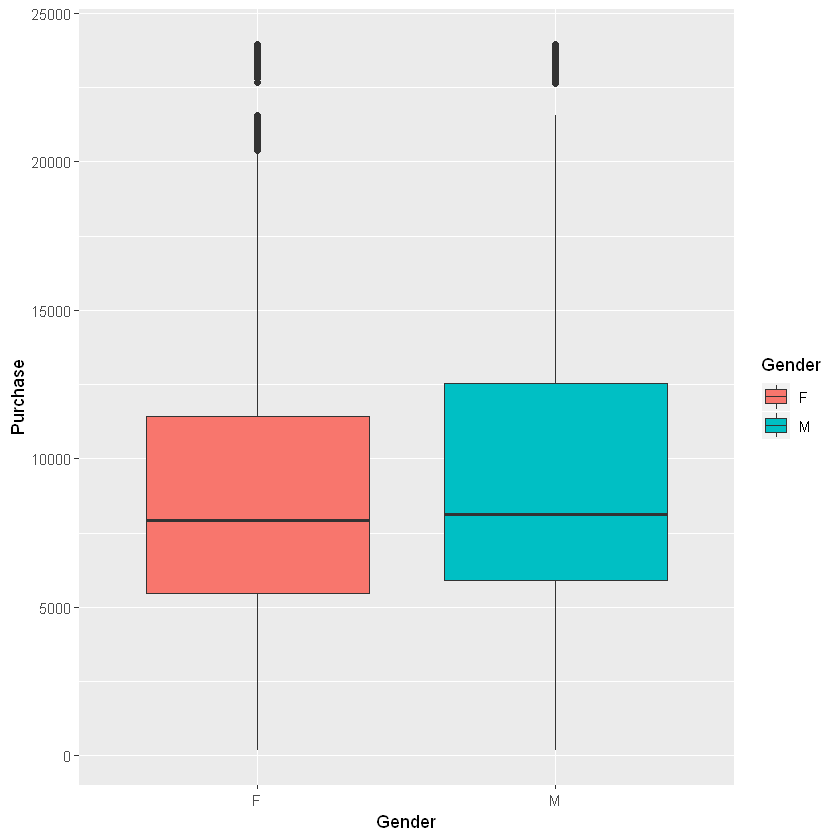

In [30]:
p9 <- ggplot(dati, aes(x = Gender, y = Purchase, fill = Gender)) +
    geom_boxplot()

p9

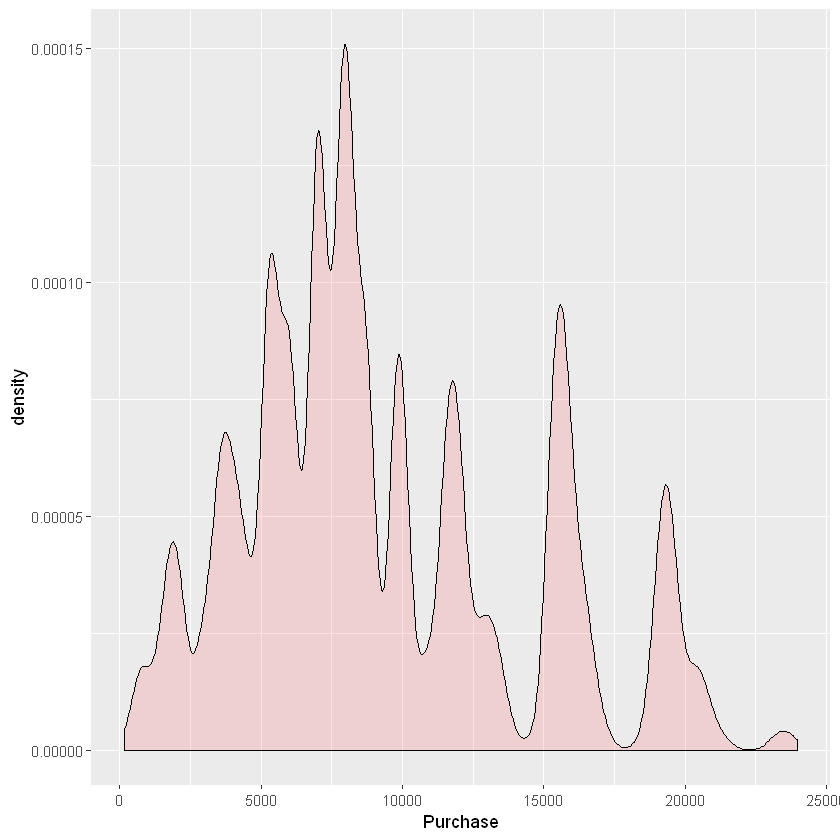

In [52]:
p10 <- ggplot(dati, aes(x=Purchase, fill = Gender)) + 
        #geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
         #          binwidth=.5,
         #          colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

p10

In [37]:
uomini <- dati[dati$Gender == "M",]

head(uomini)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
5,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
6,1000003,P00193542,M,26-35,15,A,3,0,1,2,0,15227
7,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
8,1000004,P00346142,M,46-50,7,B,2,1,1,15,0,15854
9,1000004,P0097242,M,46-50,7,B,2,1,1,16,0,15686
10,1000005,P00274942,M,26-35,20,A,1,1,8,0,0,7871


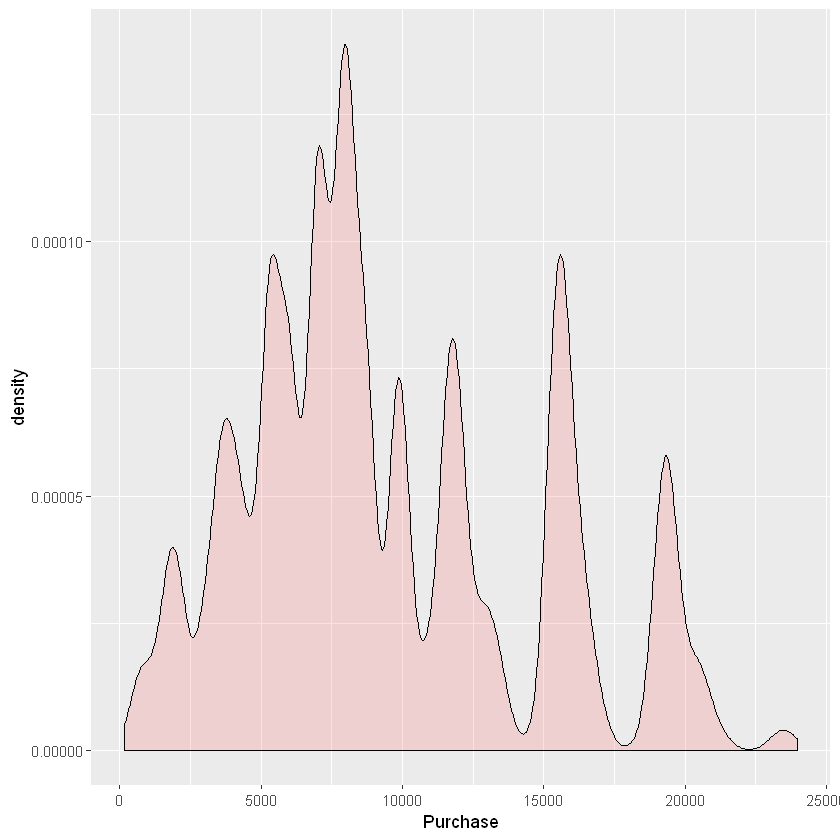

In [51]:
p10 <- ggplot(uomini, aes(x=Purchase, fill = Gender)) + 
        #geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
         #          binwidth=.5,
         #          colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

p10

In [39]:
donne <- dati[dati$Gender == "F",]

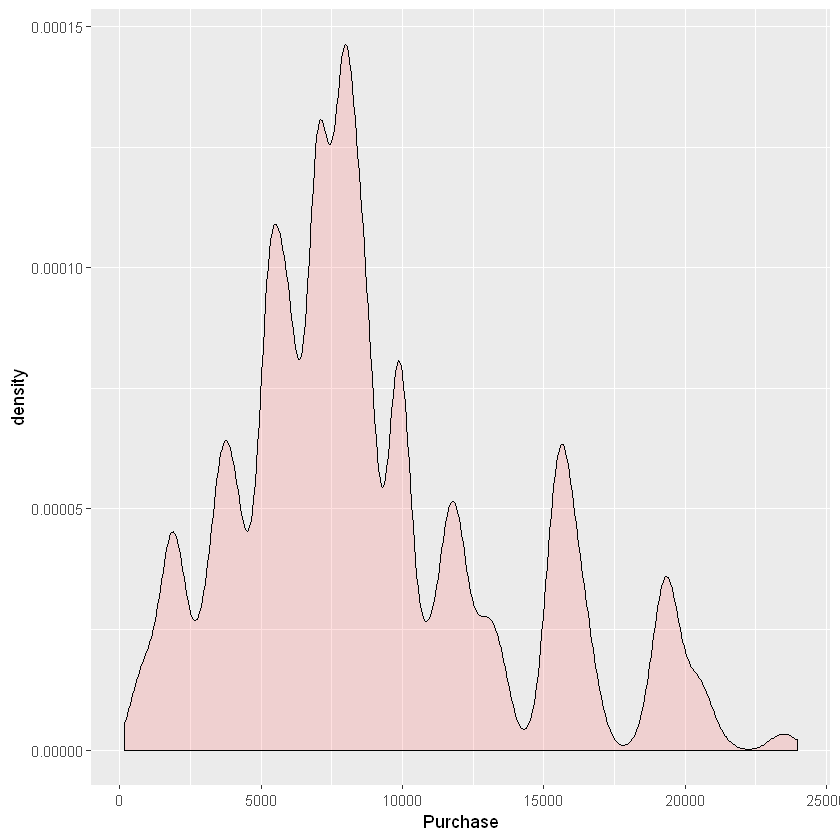

In [40]:
p10 <- ggplot(donne, aes(x=Purchase)) + 
        #geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
         #          binwidth=.5,
         #          colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

p10

In [42]:
library(reshape2)

Warning message:
"package 'reshape2' was built under R version 3.5.2"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [61]:
#install.packages("plotly", repos ="http://cran.us.r-project.org" )
library(plotly)

Warning message:
"package 'plotly' was built under R version 3.5.2"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



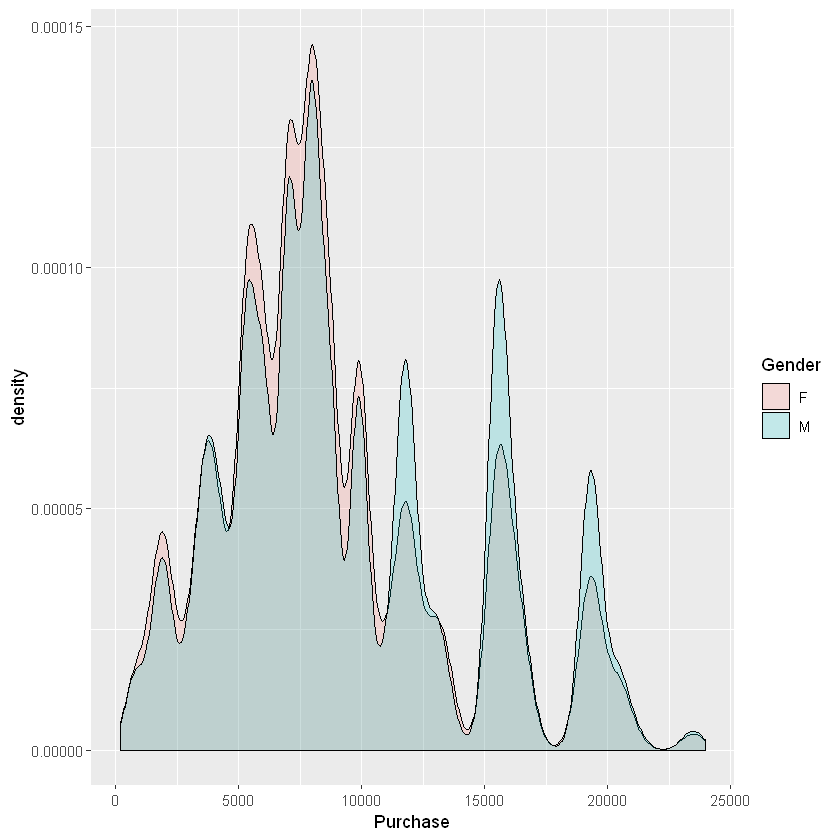

In [63]:
 p11 <- ggplot(, aes(Purchase, fill = Gender)) + geom_density(alpha = 0.2)

p11

Vediamo che gli acquisti di uomini e donne sono più o meno gli stessi.

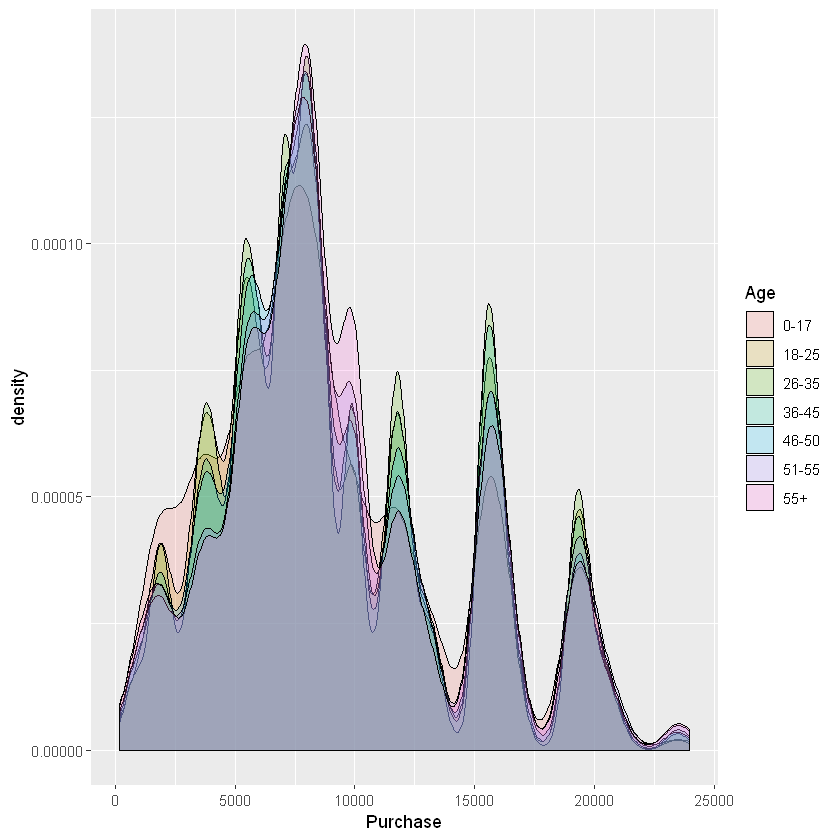

In [72]:
p12 <- ggplot(dati, aes(Purchase, fill = Age)) + (alpha = 0.2)

p12

Comportamenti per eta sembrano essere gli stessi. 

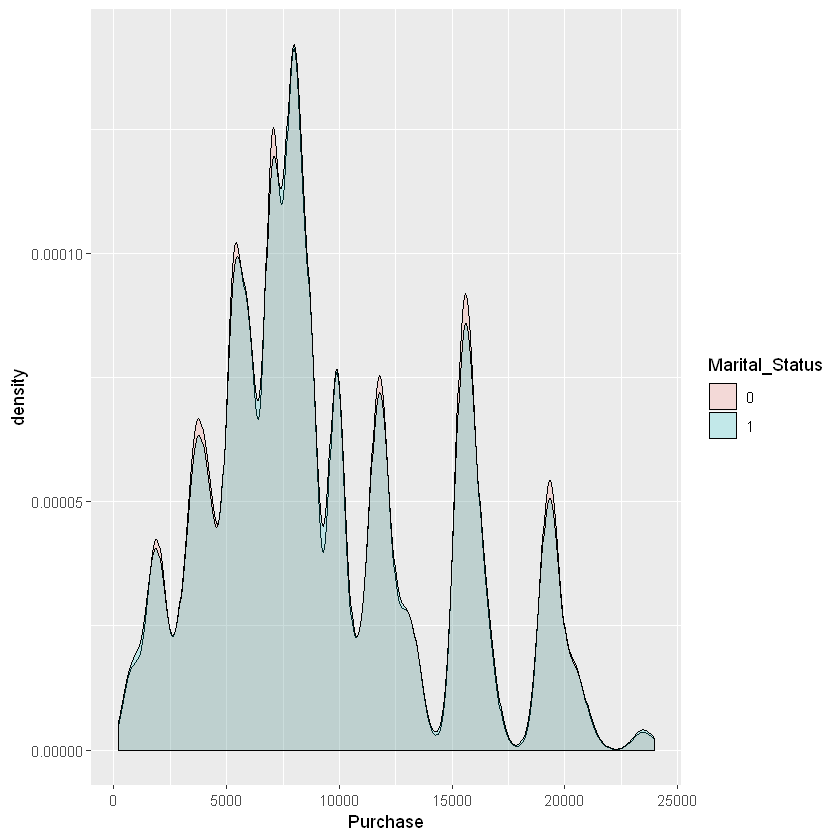

In [80]:
dati$Marital_Status <- as.factor(dati$Marital_Status)

p13 <- ggplot(dati, aes(x = Purchase, fill = Marital_Status)) + geom_density(alpha = 0.2)

p13

Anche qua non ci sono particolari differenze

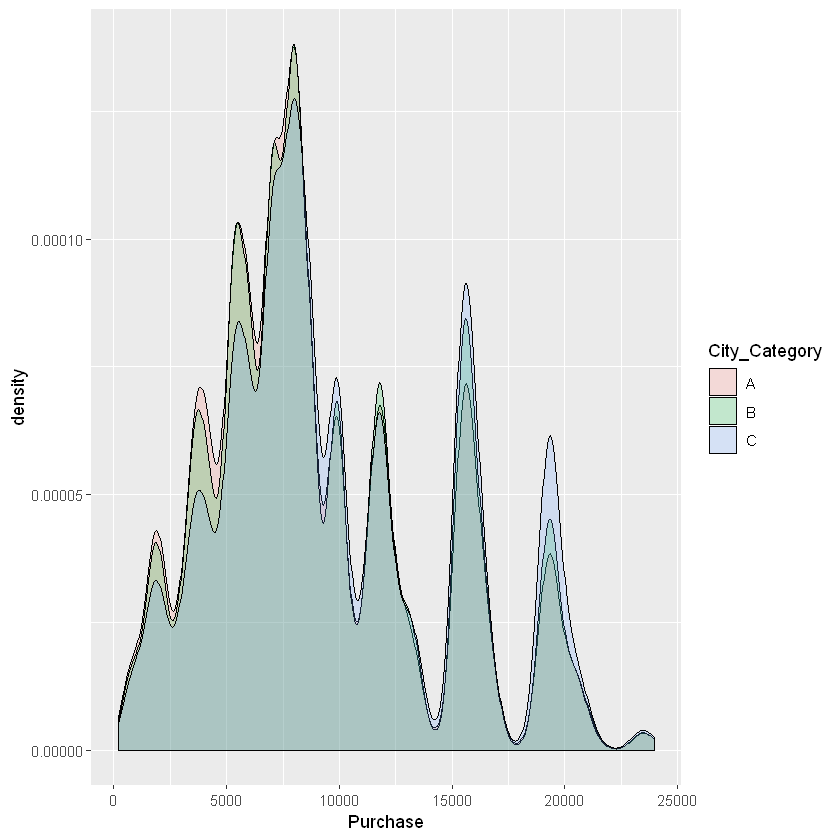

In [81]:
dati$City_Category <- as.factor(dati$City_Category)

p14 <- ggplot(dati, aes(x = Purchase, fill = City_Category)) + geom_density(alpha = 0.2)

p14

No particolari differenze 

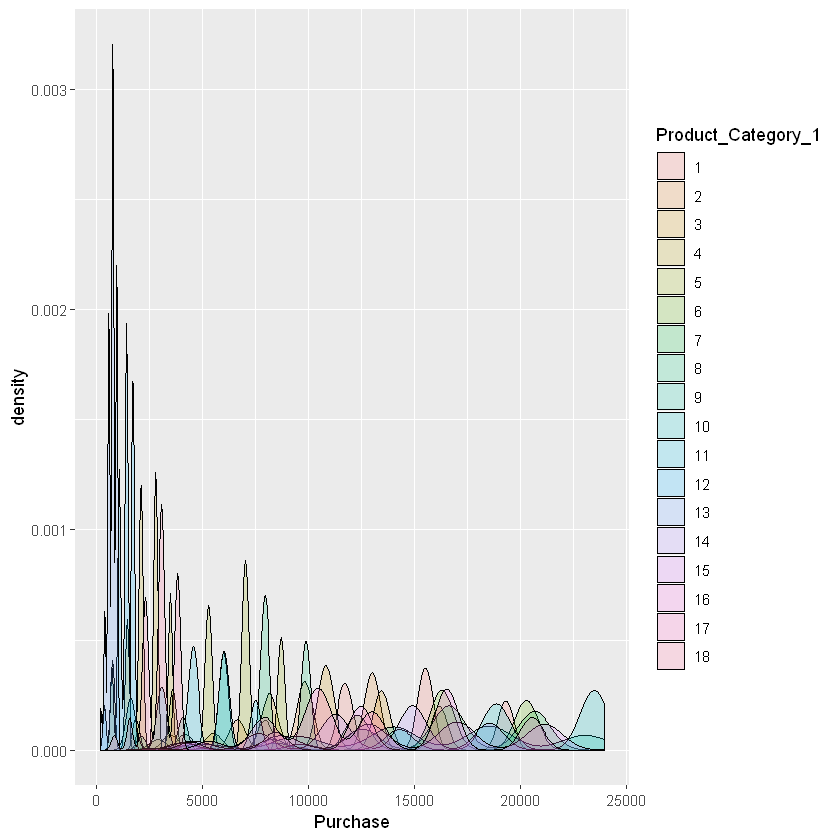

In [84]:
dati$Product_Category_1 <- as.factor(dati$Product_Category_1)

p15 <- ggplot(dati, aes(x = Purchase, fill = Product_Category_1)) + geom_density(alpha = 0.2)

p15

Si notano comportamenti molto diversi a seconda della categoria.

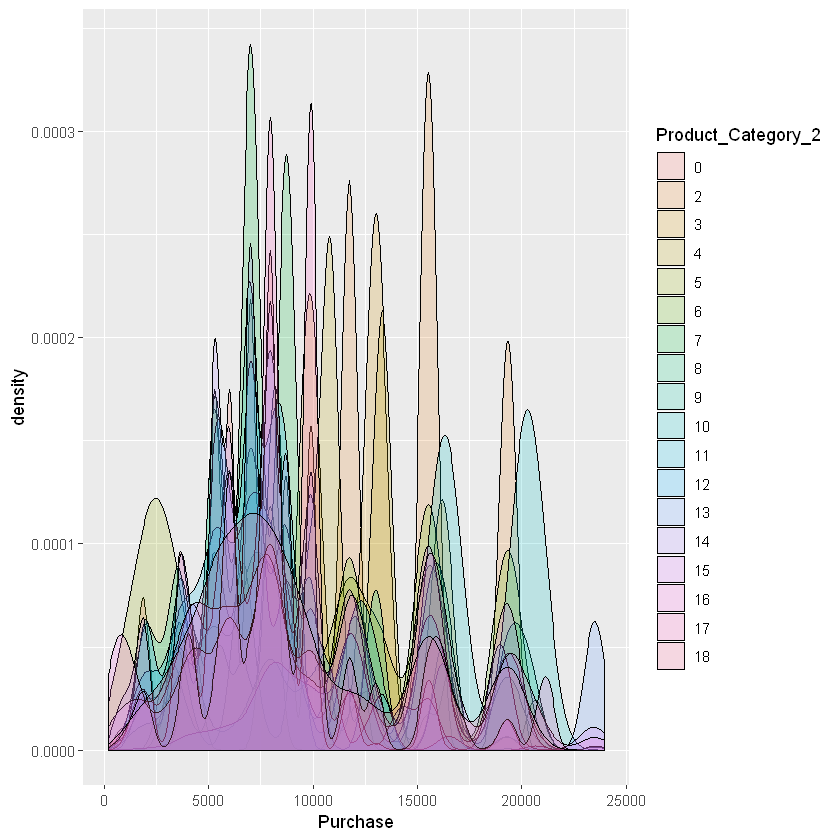

In [85]:
dati$Product_Category_2 <- as.factor(dati$Product_Category_2)

p15 <- ggplot(dati, aes(x = Purchase, fill = Product_Category_2)) + geom_density(alpha = 0.2)

p15

Notiamo comportamenti meno simili rispetto a quelli osservati nel Product1. Dobbiamo inoltre ricordarci che quando leggiamo 0 in realtà stiamo leggendo i valori mancanti

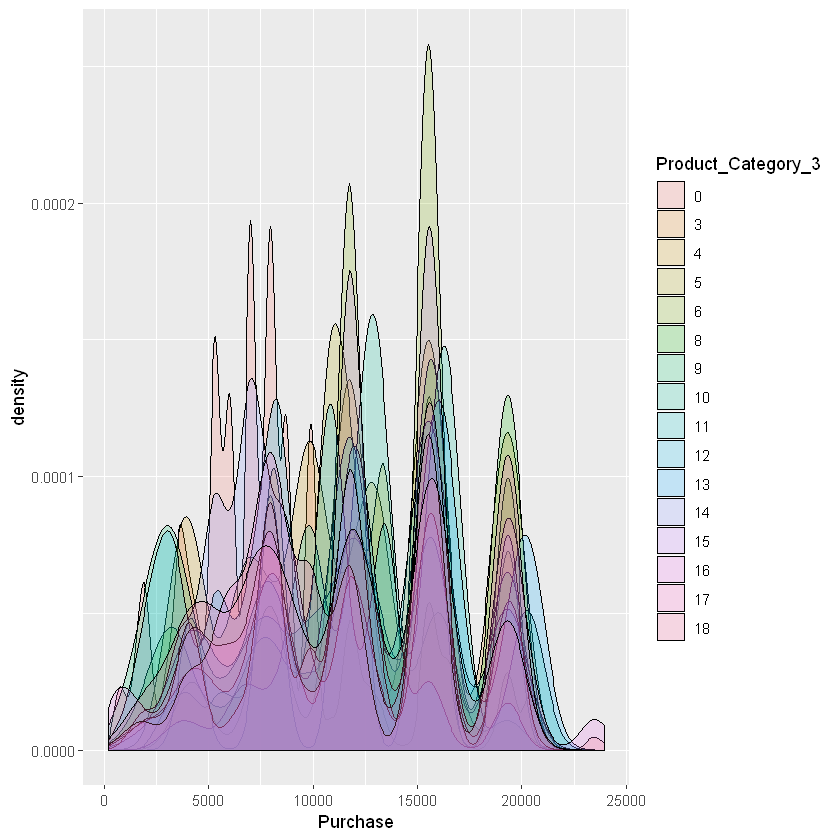

In [86]:
dati$Product_Category_3 <- as.factor(dati$Product_Category_3)

p15 <- ggplot(dati, aes(x = Purchase, fill = Product_Category_3)) + geom_density(alpha = 0.2)

p15

Anche qua i comportamenti tendono ad essere molto più simili. Sempre ricordare dello 0 = NA

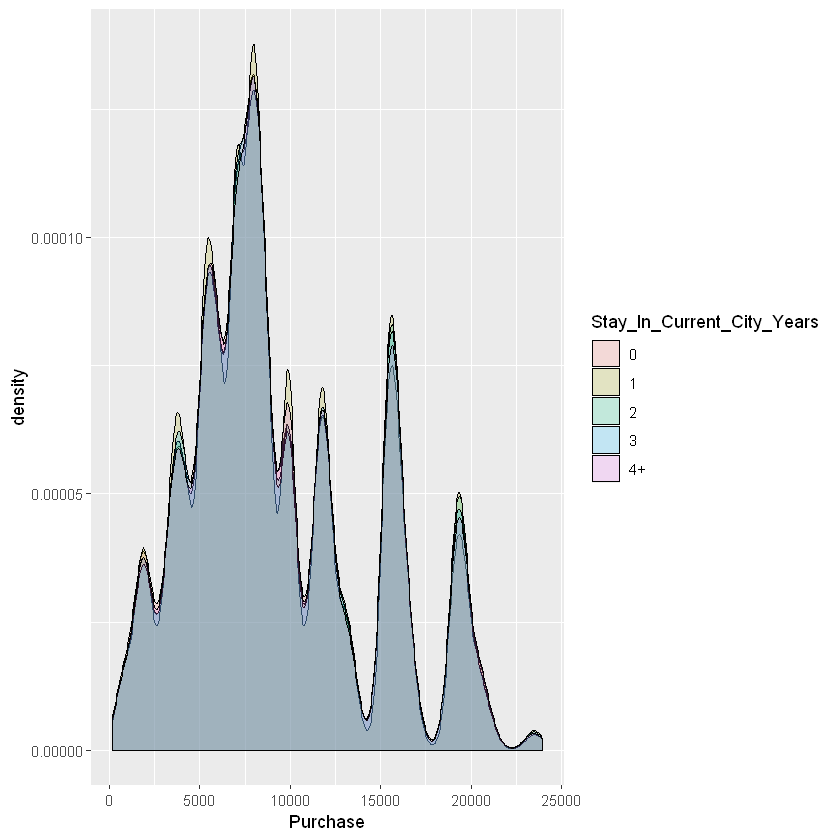

In [88]:
dati$Stay_In_Current_City_Years <- as.factor(dati$Stay_In_Current_City_Years)

p15 <- ggplot(dati, aes(x = Purchase, fill = Stay_In_Current_City_Years)) + geom_density(alpha = 0.2)

p15

## DATA PREPARTION 

Creiamo dataset unico così non ripetiamo la stessa persona

In [ ]:
EDA_Distinct <- distinct(dati, User_ID, Age, Gender, Marital_Status,
                         Occupation, City_Category, Stay_In_Current_City_Years)
head(EDA_Distinct)

In [ ]:
userIDCount <- as.data.frame(table(dati$User_ID))
names(userIDCount) <- c("User_ID", "User_Purchase_Count")
head(userIDCount)

In [ ]:
dati <- merge(x = dati, y = userIDCount, by = "User_ID", all.x = TRUE)

In [ ]:
EDA_Distinct <- distinct(dati, User_ID, Age, Gender, Marital_Status, Occupation, City_Category, Stay_In_Current_City_Years, User_Purchase_Count)

In [ ]:
#install.packages("reshape2", repos = "http://cran.us.r-project.org")
library(reshape2)

In [ ]:
d1 <- summary(friday.users$User_Purchase_Count)

p1 <- ggplot(EDA_Distinct, aes(x=User_Purchase_Count)) +geom_density(fill="red", col="black", alpha=0.80) + annotate(geom = "text", x = 6, y = 0.0125, label = "Min")  + annotate(geom = "text", x = 24, y = 0.013, label = "1st Qu.") + annotate(geom = "text", x = 50, y = 0.0125, label = "Median") + annotate(geom = "text", x = 90, y = 0.013, label = "Mean") + annotate(geom = "text", x = 112, y = 0.0125, label = "3rd Qu.") + annotate(geom = "text", x = 1015, y = 0.0125, label = "Max") + geom_vline(xintercept = c(6, 26, 54, 93.37, 117, 1026), size = 0.2, col = 'black') #+ lims(x = )

p2 <- ggplot(EDA_Distinct, aes(x=User_Purchase_Count)) +geom_histogram(fill="red", col="black", alpha=0.80) 

p3 <- ggplot(EDA_Distinct,aes(x= Age,y=User_Purchase_Count, fill=Age)) + geom_boxplot() + facet_grid(Gender~Marital_Status) + labs(x="Age",y="Customer Purchase Count")

p4 <- ggplot(EDA_Distinct,aes(x= Occupation,y=User_Purchase_Count, fill=Occupation)) + geom_boxplot() + facet_grid(Gender~Marital_Status) + labs(x="Occupation",y="Customer Purchase Count")

p5 <- ggplot(EDA_Distinct,aes(x=Age,y=User_Purchase_Count,fill=Stay_In_Current_City_Years))+geom_boxplot()+facet_grid(City_Category~ Stay_In_Current_City_Years) + labs(x="Age",y="Customer Purchase Count")

p5i <- ggplot(EDA_Distinct,aes(x=Age,y=User_Purchase_Count,fill=Stay_In_Current_City_Years))+geom_boxplot()+facet_grid( Stay_In_Current_City_Years ~ City_Category) + labs(x="Age",y="Customer Purchase Count")

p6 <- ggplot(EDA_Distinct,aes(x=Age,y=User_Purchase_Count,fill=Marital_Status))+geom_boxplot()+facet_grid(Gender~City_Category) + scale_fill_manual(values=c("tan4","limegreen"))  + labs(x="Age",y="Customer Purchase Count")

#grid.arrange(p1, p2, p3, p4 ,p5i ,p6, ncol = 1, nrow = 6); 
d1;p1;p2;p3;p4;p5;p5i;p6